# Lesson 4: K-Means Clustering and Image Analysis 

Earlier, you saw how we can use Python to analyze image data effectively to identify and modify features of MRI scan data.  This time around, you will apply data mining techniques to identify features of satellite images and astronomical images.

**Objectives:**
-   Convert an image between color spaces.
-   **Apply data mining techniques such as clustering to identify image features.**
-   Apply machine learning techniques to identify image features.

In [1]:
import numpy as np
import scipy as sp
from numpy import random as npr
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from sklearn.feature_extraction import image
from sklearn.cluster import KMeans

## Clustering Analysis

Clustering analysis is a type of unsupervised learning used commonly in machine learning and data mining.  In this lesson, we will be introducing the $k$-means method as well as a way to evaluate the performance of clustering models.

We will generate a clean random data set to demonstrate the technique initially.

In [2]:
k = 3       # number of clusters
n = 50      # number of points per cluster

sigma = 0.4 # stdev of cluster
centers = [ ( 0,1 ),( 1,0 ),( -0.5,-0.5 ) ]

# Creates the random dataset
samples = np.zeros( ( k*n,2 ) )
for index,center in enumerate( centers ):
    samples[ index*n:( index+1 )*n,: ] = npr.randn( n,2 ) * sigma + center

Here is the dataset with colours representing different "classes" of data. We will be using this function below again, to compare the obtained results from clustering techniques with the original dataset.

In [3]:
def plot_original_clusters( ax, sample, color_list=[ 'bx','rx','gx' ]):
    for index,mrkr in enumerate( color_list ):
        data = sample[ index*n:( index+1 )*n,: ]
        ax.plot( data[ :,0 ],data[ :,1 ],mrkr ,markersize=12)

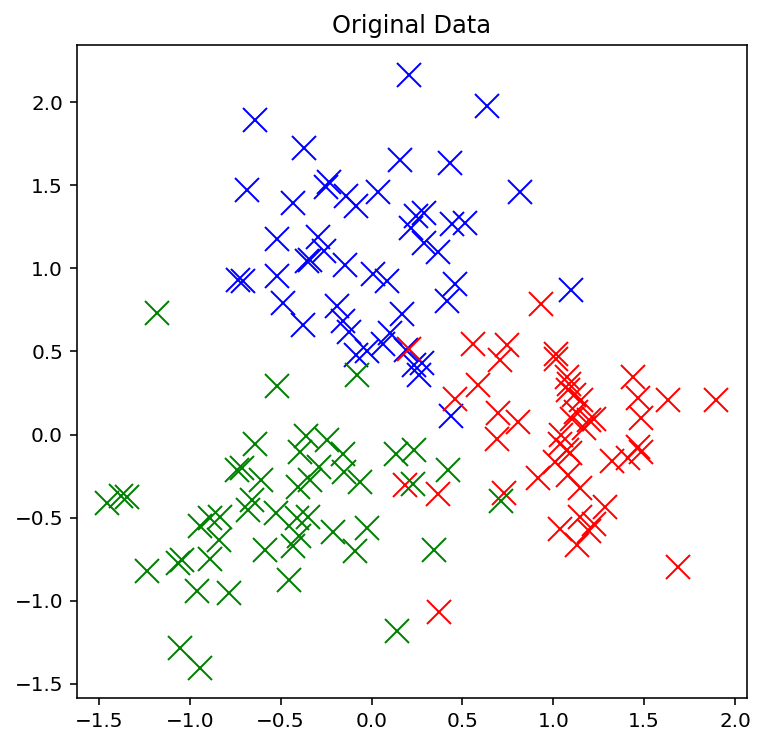

In [4]:
fig,ax = plt.subplots(figsize=(6,6))
plot_original_clusters(ax,samples)
plt.title( 'Original Data' )
plt.show()

The anonymized data represents the input the algorithm will see - the original dataset without the colours representing different "classes" of data.

The algorithm will not receive the extra class information when it tries to separate the data.

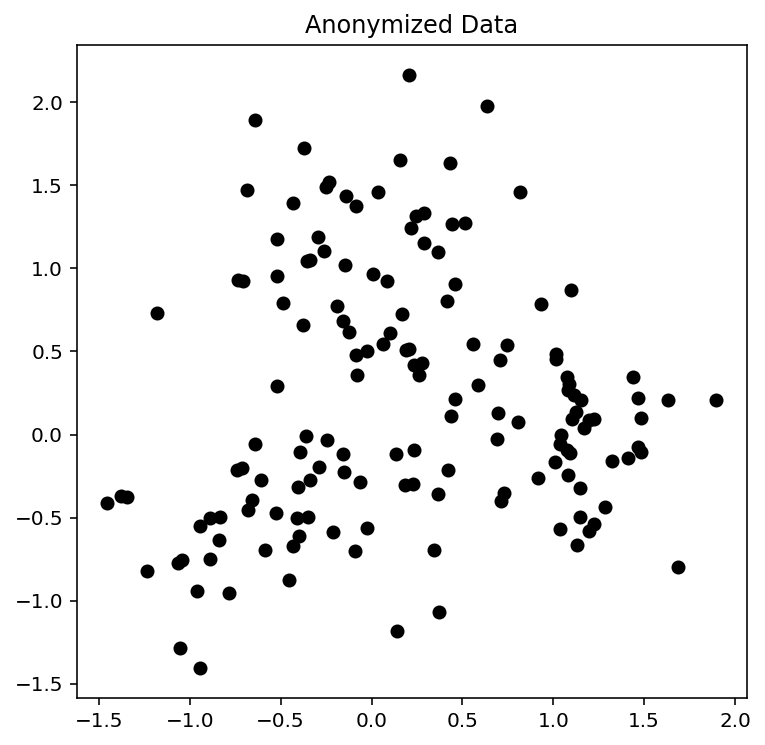

In [5]:
fig,ax = plt.subplots(figsize=(6,6))
plt.plot( samples[ :,0 ],samples[ :,1 ],'ko' )
plt.title( 'Anonymized Data' )
plt.show()

### k-means
[$k$-means clustering](https://en.wikipedia.org/wiki/K-means_clustering) takes a set of observations or samples and attempts to separate them into $k$ groups or clusters.  This value of $k$ is something chosen ahead of time by whoever is creating the model, so different values of $k$ will yield different clusters.

Optimal cluster "centers" are picked in an attempt to maximize the gaps between clusters, because we want to reduce any ambiguity in our model.

Although the algorithm used to find the clusters isn't too difficult to implement, [scikit-learn](https://scikit-learn.org/stable/), a Python library for machine learning, conveniently implements this ([sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)) and many other machine learning methods for us.

##### Using KMeans with **$k = 2$** clusters:

In [6]:
from sklearn.cluster import KMeans

k = 2
est = KMeans( n_clusters=k )
est.fit( samples )
labels = est.labels_

In [7]:
def plot_Kmeans_clusters(ax, sample, label, k):
    colors = [ 'bo','ro','go','mo','yo','co','ko' ]
    for i in range( k ):
        data = sample[ label == i ]
        ax.plot( data[ :,0 ],data[ :,1 ],colors[ i ] )

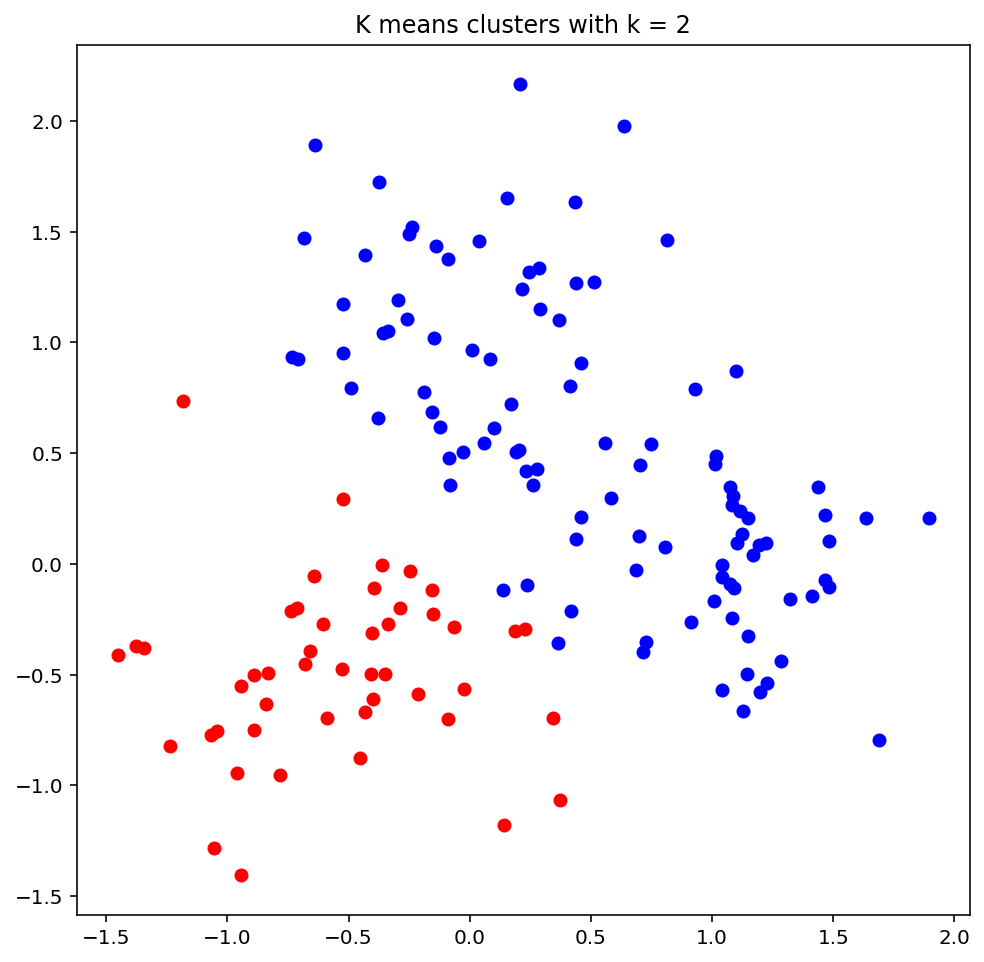

In [8]:
fig,ax = plt.subplots(figsize=(8,8))
plot_Kmeans_clusters(ax, samples, labels, k)
plt.title( 'K means clusters with k = %i'%k )
plt.show()

We can now compare the results from K-means with the original dataset

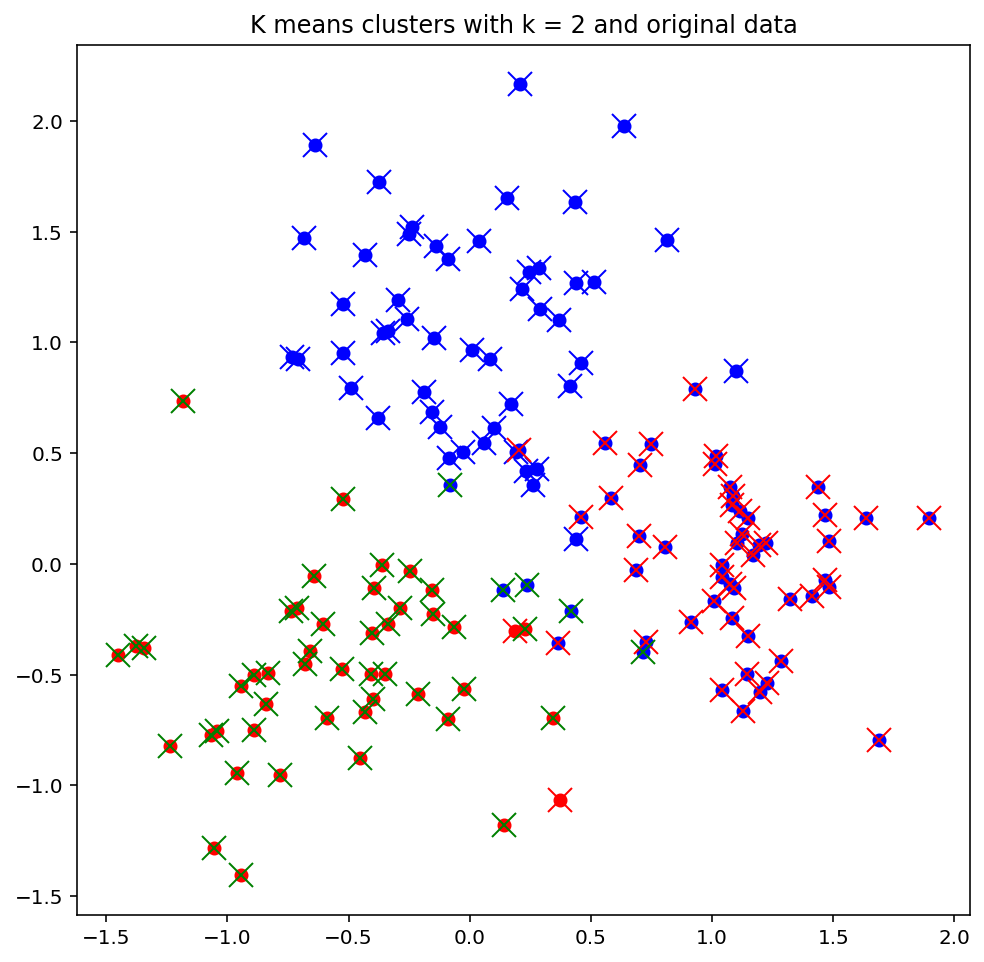

In [9]:
fig,ax = plt.subplots(figsize=(8,8))
plot_Kmeans_clusters(ax, samples, labels, k)
plot_original_clusters(ax,samples)
plt.title( 'K means clusters with k = %i and original data'%k )
plt.show()

##### Repeat the KMeans analysis with **$k = 3$** clusters. 

Then try $k \in \{ 4..7 \}$ to explore how the model responds.  (The colour vector doesn't contain more entries than seven however.)


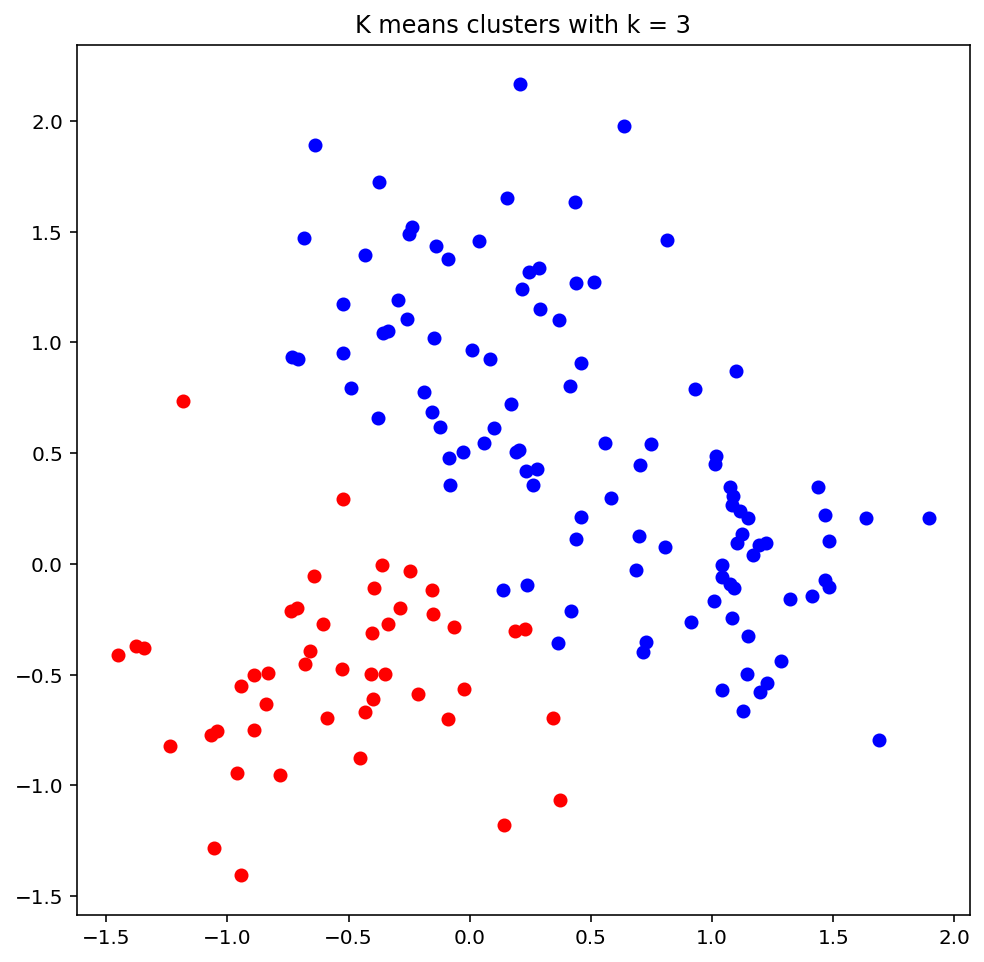

In [10]:
#K = 3
fig,ax = plt.subplots(figsize=(8,8))
plot_Kmeans_clusters(ax, samples, labels, 3)
plt.title( 'K means clusters with k = %i'%3 )
plt.show()

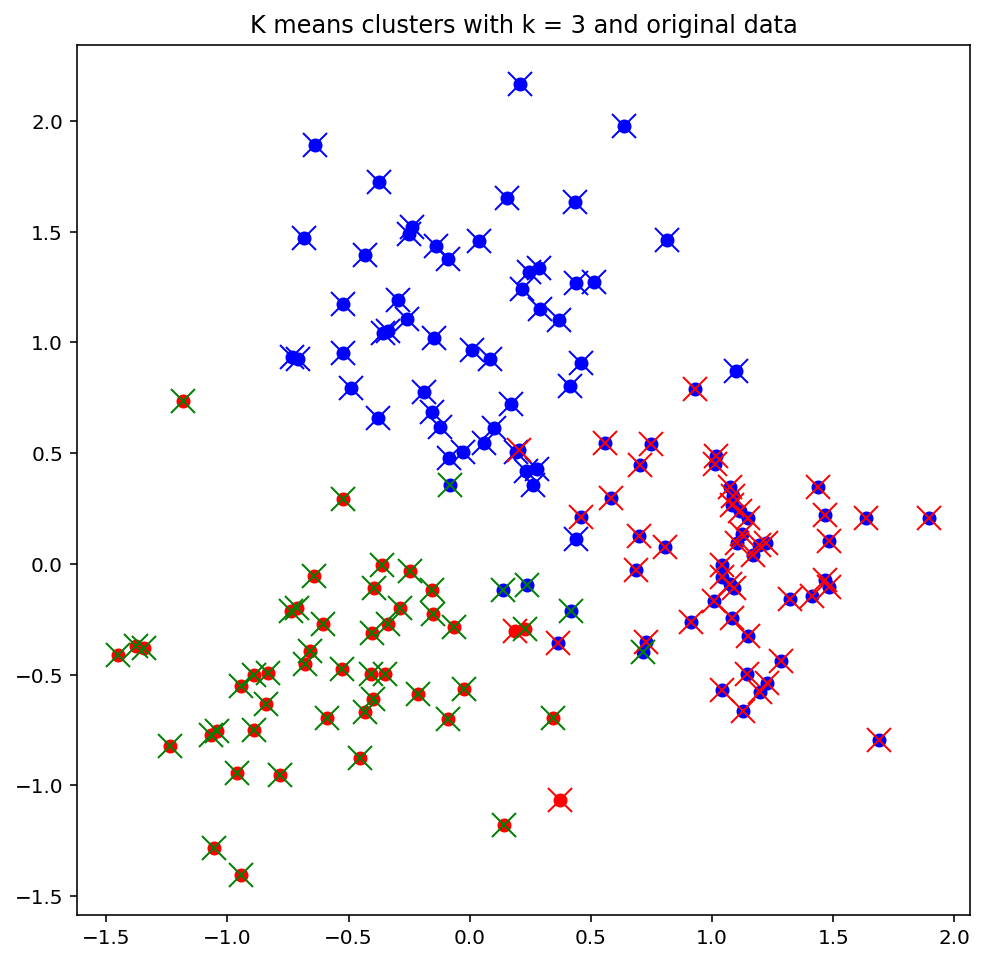

In [11]:
fig,ax = plt.subplots(figsize=(8,8))
plot_Kmeans_clusters(ax, samples, labels, 3)
plot_original_clusters(ax,samples)
plt.title( 'K means clusters with k = %i and original data'%3 )
plt.show()

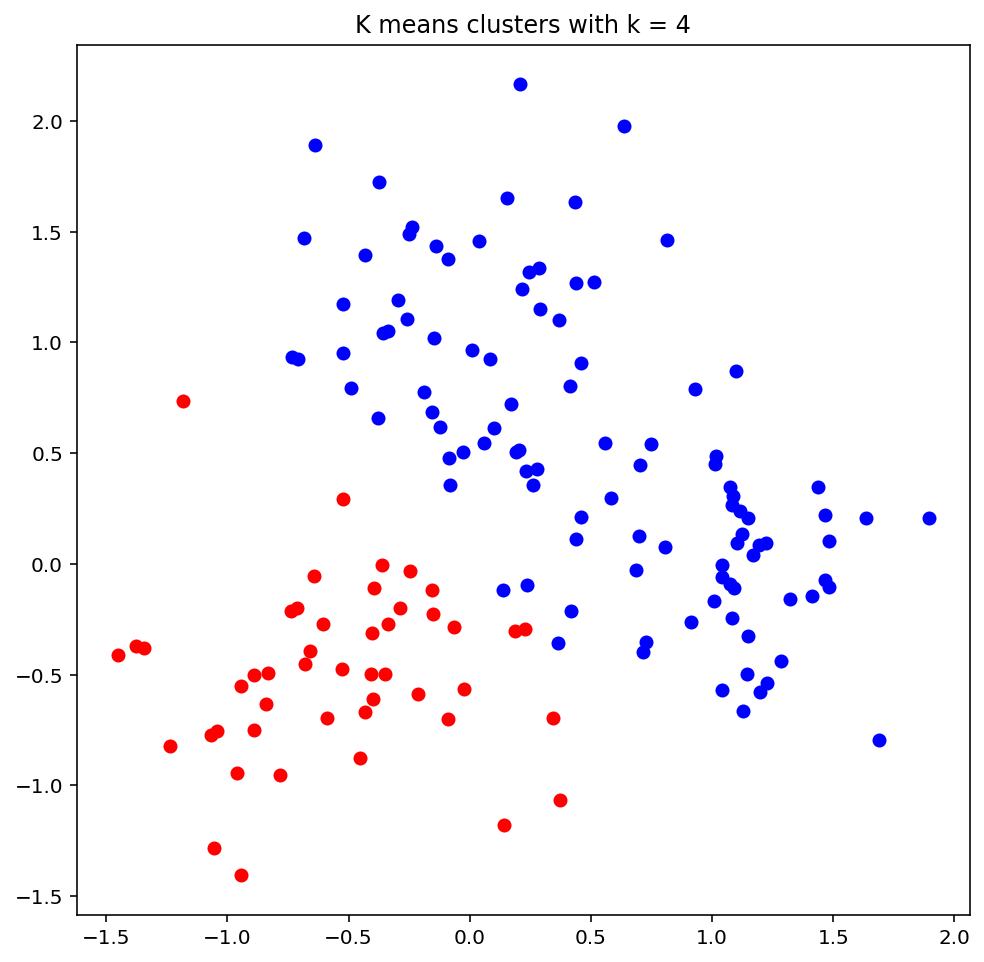

In [12]:
#k=4
fig,ax = plt.subplots(figsize=(8,8))
plot_Kmeans_clusters(ax, samples, labels, 4)
plt.title( 'K means clusters with k = %i'%4 )
plt.show()

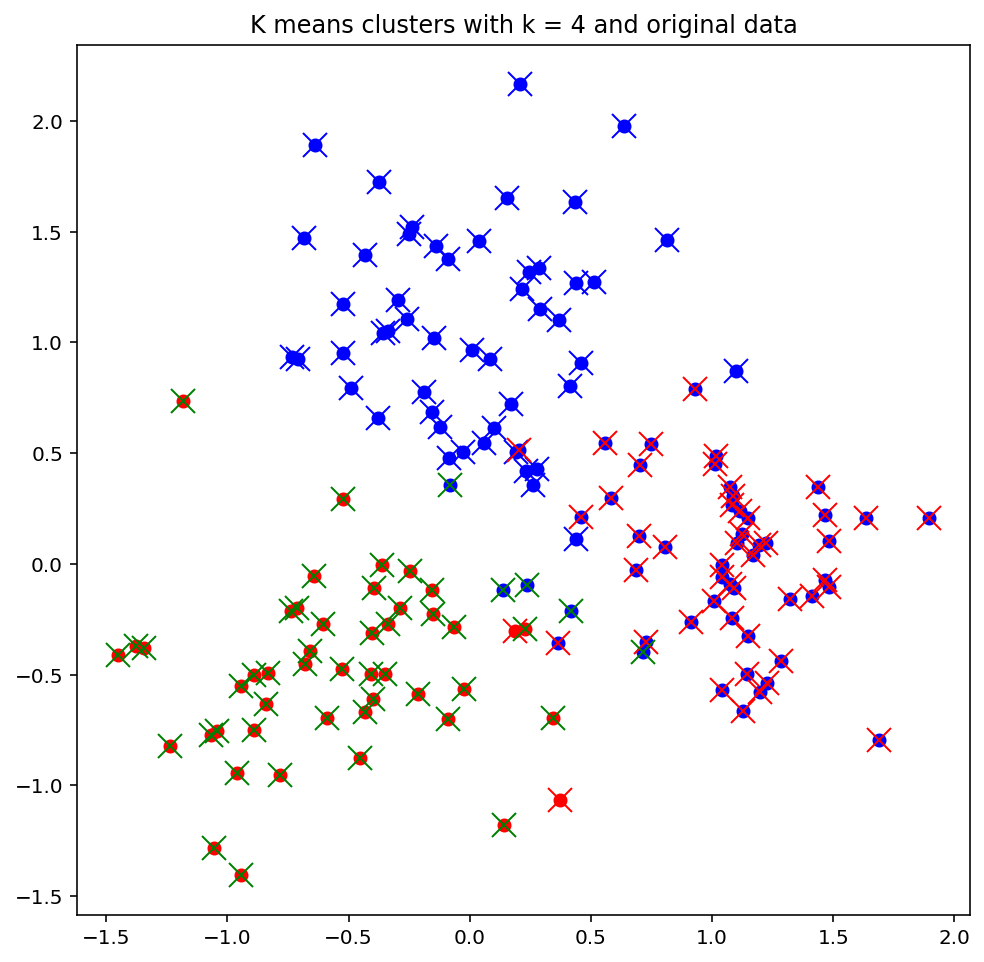

In [13]:
fig,ax = plt.subplots(figsize=(8,8))
plot_Kmeans_clusters(ax, samples, labels, 4)
plot_original_clusters(ax,samples)
plt.title( 'K means clusters with k = %i and original data'%4 )
plt.show()

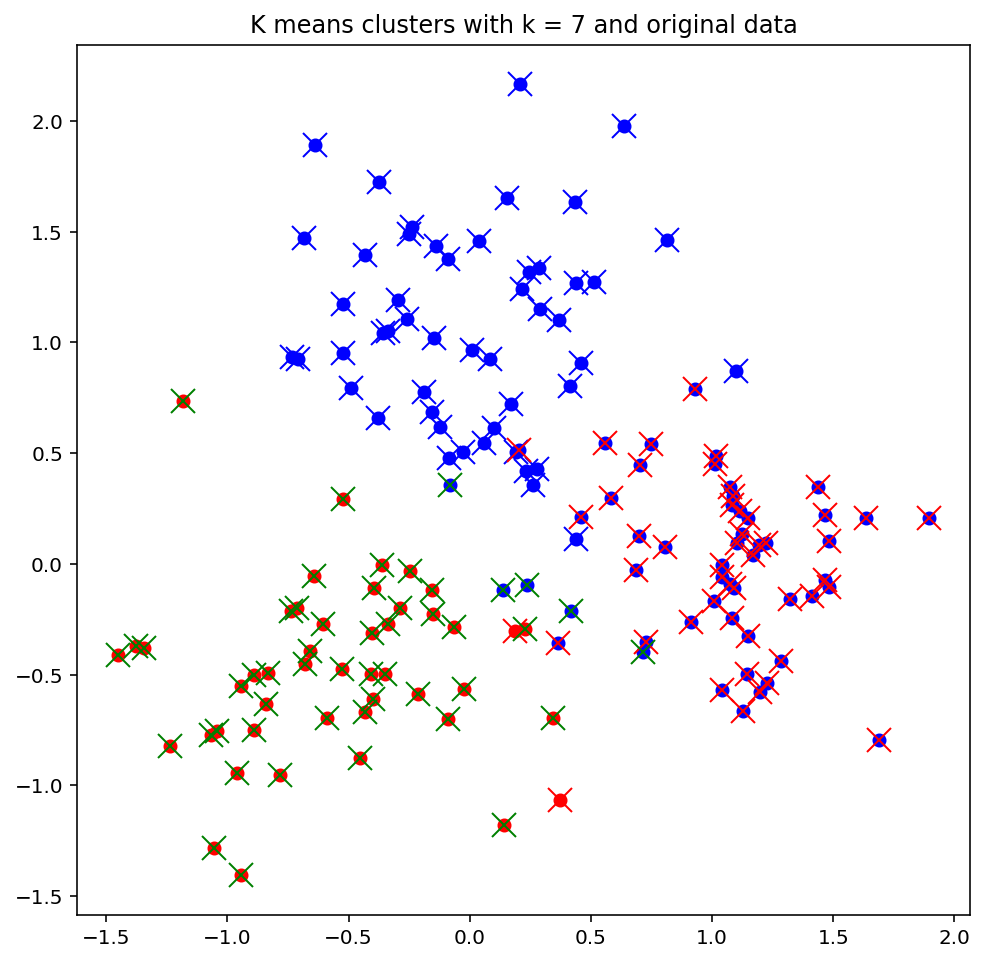

In [14]:
#k=7
fig,ax = plt.subplots(figsize=(8,8))
plot_Kmeans_clusters(ax, samples, labels, 7)
plot_original_clusters(ax,samples)
plt.title( 'K means clusters with k = %i and original data'%7 )
plt.show()

Because the algorithm doesn't know the groups ahead of time (or, it shouldn't), the groupings it produces may have different labels than the original data.  For example, it may switch around the groups for "red" and "blue" points, but it still manages to differentiate between them.

To predict the association of new values, use `est.predict()`. Change the number of clusters in the code snippet below to see another visualization of the clusters.

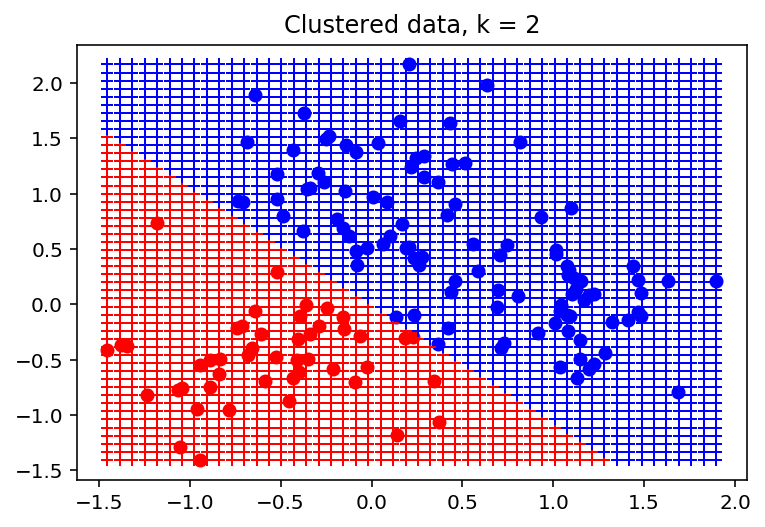

In [15]:
# put your prediction code here!

##

X,Y = np.meshgrid( np.linspace( samples[ :,0 ].min(),samples[ :,0 ].max() ),np.linspace( samples[ :,1 ].min(),samples[ :,1 ].max() ) )
X = X.ravel()
X.shape = len( X ),1 # same as X = X[:,np.newaxis]
Y = Y.ravel()
Y.shape = len( Y ),1
datapts = np.concatenate((X,Y), axis=1)
C = est.predict(datapts)

fig,ax = plt.subplots()

colors = [ 'bo','ro','go','mo','yo','co','ko' ]
for i in range(k):
    data = samples[ labels == i ]
    ax.plot( data[ :,0 ],data[ :,1 ],colors[ i ] )
colors = [ 'b+','r+','g+','m+','y+','c+','k+' ]
for i in range( len( C ) ):
    ax.plot( X[ i ],Y[ i ],colors[ C[ i ] ] )
plt.title( 'Clustered data, k = %i'%k )
plt.show()


### Evaluation:  Silhouette method

Since any $k$ gives us results of some kind, we need a way to determine which set of clusters is the "best", by whatever metric.  In the example above, it was easy to see that $3$ would be optimal since we knew that information ahead of time.  But if we are mining data abstractly, how do we distinguish the goodness of fit for several $k$s?

One such evaluation for cluster performance is called _Silhouette analysis_.  The silhouette value measures how similar an object is to its own cluster compared to other clusters.  This value ranges from $-1$ to $+1$, with high values meaning the point matches well to its own cluster and poorly to others. A set of cluster centers with high _average silhouette value_ means the clusters are able to separate the data points optimally.

The silhouette value for point $i$ is given by:
$$s_i = \frac{b_i - a_i}{\max\left(a_i, b_i\right)}$$
where $a_i$ is the average distance between point $i$ and every other point in its **own** cluster, and $b_i$ is the _smallest_ average distance between point $i$ and the points in every **other** cluster.  Fortunately, `scikit-learn` has functions to calculate this so you don't have to.

In [16]:
import sklearn.metrics as metrics

# Example for k=3 clusters
est = KMeans( n_clusters=3 )
est.fit( samples )
clusters = est.predict(samples)

print("Overall mean silhouette score:")
print(metrics.silhouette_score(samples, clusters))

print()
print("Silhouette score per sample:")
print(metrics.silhouette_samples(samples, clusters))

Overall mean silhouette score:
0.5170005823086351

Silhouette score per sample:
[0.29030926 0.45923574 0.65154411 0.4383346  0.35751877 0.65185838
 0.40897389 0.49149201 0.32046834 0.49705233 0.65682917 0.57408933
 0.34728061 0.24075738 0.5336994  0.56697725 0.6270865  0.62134156
 0.47331965 0.39114424 0.4339652  0.60098224 0.51978893 0.47975498
 0.65352427 0.40101336 0.44656386 0.42370131 0.34650258 0.58328166
 0.58493154 0.05886998 0.55053684 0.56348889 0.53743714 0.47120696
 0.16151068 0.61717918 0.59158154 0.65551886 0.2885881  0.55108808
 0.48776974 0.62846208 0.1244351  0.64627468 0.62701807 0.44479793
 0.59057494 0.64212768 0.62071525 0.69947181 0.58803128 0.71774568
 0.61435733 0.61266373 0.70069888 0.51017824 0.70024689 0.1374109
 0.72305834 0.6674263  0.64693296 0.713045   0.68665716 0.66978282
 0.70984158 0.10189941 0.61623179 0.53244105 0.54526289 0.64073931
 0.53742384 0.6904806  0.6821101  0.71318824 0.50385815 0.09316749
 0.63484581 0.30083755 0.60808387 0.65229723 0.307

- Determine the average silhouette value using ` sklearn.metrics.silhouette_score` for $k \in \left[2, 8\right]$. 

- Save these values in a list

- Use `matplotlib` (scatter) to plot number of clusters versus silhouette value. Does this result match your intuition?

In [17]:
K = 3
new_est2 = KMeans(n_clusters = 2)
new_est2.fit(samples)
new_clusters2 = new_est2.predict(samples)
print("The average silhouette value for k = 2 is:", metrics.silhouette_score(samples, new_clusters2))

The average silhouette value for k = 2 is: 0.39788033078418955


In [18]:
#K = 4
new_est4 = KMeans(n_clusters = 4)
new_est4.fit(samples)
new_clusters4 = new_est4.predict(samples)
print("The average silhouette value for k = 4 is:", metrics.silhouette_score(samples, new_clusters4))

The average silhouette value for k = 4 is: 0.41596685200326844


In [19]:
#K = 5
new_est5 = KMeans(n_clusters = 5)
new_est5.fit(samples)
new_clusters5 = new_est5.predict(samples)
print("The average silhouette value for k = 5 is:", metrics.silhouette_score(samples, new_clusters5))

The average silhouette value for k = 5 is: 0.386642219692314


$k$-means clustering is a crude but easily implemented heuristic, and sometimes does surprisingly well.  A brief analysis of its practical limits is available with [the `scikit-learn` documentation](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py).

You may want to later explore the [clustering gallery](http://scikit-learn.org/stable/auto_examples/index.html#cluster-examples) for `scikit-learn`.

###  Color-Space Segmentation Using K-Means Clustering for Satellite Image Analysis

Color is an extremely sophisticated notion.  It unifies the physical wavelength of light, the biological expression of cell distribution and pigment receptors in the eye, the neurological interpretation of the resulting optic signal, and the psychological factors of culture and perception<sup>[[ref]](https://en.wikipedia.org/wiki/Opponent_process)</sup>.  Unsurprisingly, there are a lot of different ways to represent colors.  Color spaces represent different colors according to essentially different orthogonal bases.  For instance, you’re probably familiar with $RGB$ and $CMYK$ color spaces.

<table>
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/AdditiveColor.svg/240px-AdditiveColor.svg.png" /></td>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/SubtractiveColor.svg/240px-SubtractiveColor.svg.png" /></td>
</tr>
</table>

But there are many others, such as [$Lab$](https://en.wikipedia.org/wiki/Lab_color_space) and [$XYZ$](https://en.wikipedia.org/wiki/CIE_1931_color_space).  These color spaces do not necessarily cover the same range of [perceptible colors]() (or [imperceptible ones!](https://en.wikipedia.org/wiki/Impossible_color)), but transformations between spaces [can still be defined](http://www.brucelindbloom.com/Math.html).  We will use this below to convert between $RGB$ and $Lab$.

$Lab$ was designed to replicate human vision, and exploits the fact that in a sense there are [four fundamental colors](https://en.wikipedia.org/wiki/Opponent_process) that the human eye can perceive:  a red-green axis $a$ and a blue-yellow axis $b$.  Adding luminosity $L$ (or brightness) to these chromaticity axes yields a three-parameter color space that is actually more expressive than can be represented by $RGB$ triplets.

#### Converting from RGB to Lab

In [20]:
import logging
import math
import imageio
import colormath
import colormath.color_objects
import colormath.color_conversions

# Create functions to create colours and convert between colour spaces
to_rgb_color = np.vectorize(colormath.color_objects.sRGBColor)
convert_color = np.vectorize(colormath.color_conversions.convert_color)

#### Read Satellite Image

Inspired by an example at http://www.mathworks.com/help/images/examples/color-based-segmentation-using-k-means-clustering.html


(256, 256, 4)


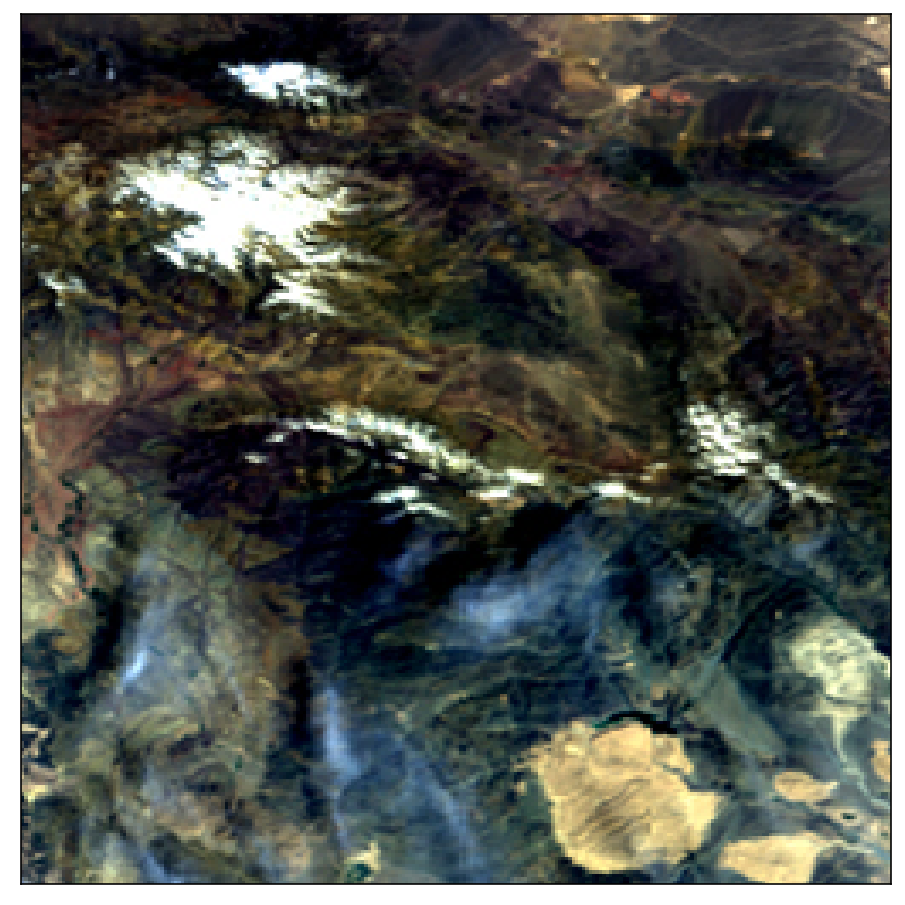

In [21]:
from pylab import imread, imshow, gray, mean
sat_img = imread('./img/satellite.png')
plt.figure(figsize=(8,8))
plt.xticks([])
plt.yticks([])
imshow(sat_img)
print(sat_img.shape)

In [22]:
# Convert to colormath rgb objects, then to lab objects, then back to a numpy array

sat_rgb_obj = to_rgb_color(sat_img[:,:,0], sat_img[:,:,1], sat_img[:,:,2])
sat_lab_obj = convert_color(sat_rgb_obj, colormath.color_objects.LabColor)

sat_lab = np.ones((sat_lab_obj.shape[0], sat_lab_obj.shape[1], 3))

# Recentering and Scaling
for i in range(sat_lab_obj.shape[0]):
    for j in range(sat_lab_obj.shape[1]):
        sat_lab[i,j,0] = sat_lab_obj[i,j].lab_l/200+100 #rgb_r
        sat_lab[i,j,1] = sat_lab_obj[i,j].lab_a/200+100 #rgb_g
        sat_lab[i,j,2] = sat_lab_obj[i,j].lab_b/200+100 #rgb_b
        
sat_lab.shape

(256, 256, 3)

#### Visualizing different colorspaces

Recall that we created a function to plot individual color channels of an image. Let's use that function again here.

In [23]:
def one_channel_image(img,channel_id):
    # Need to make all the other RGB channels set to zero
    new_img = np.copy(img)   
    for i in range(3):
        if i != channel_id:
            new_img[:,:,i] =  np.zeros((img.shape[0],img.shape[1]), img.dtype)
    return new_img   

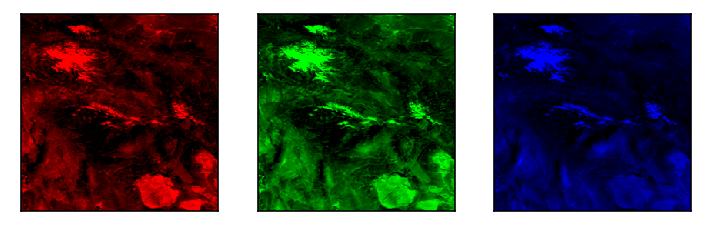

In [24]:
# Full-color image
plt.figure()
for i in range(3):
    new_image = one_channel_image(sat_img,i)
    plt.subplot(1,3,i+1)
    plt.imshow(new_image, cmap='gray')
    plt.xticks([])
    plt.yticks([])

Now that we've converted the satellite image from RGB to Lab, we can use a pre-defined function from matplotlib to plot the different color channels of the image in both colorspaces (take a look how this can be done below!)

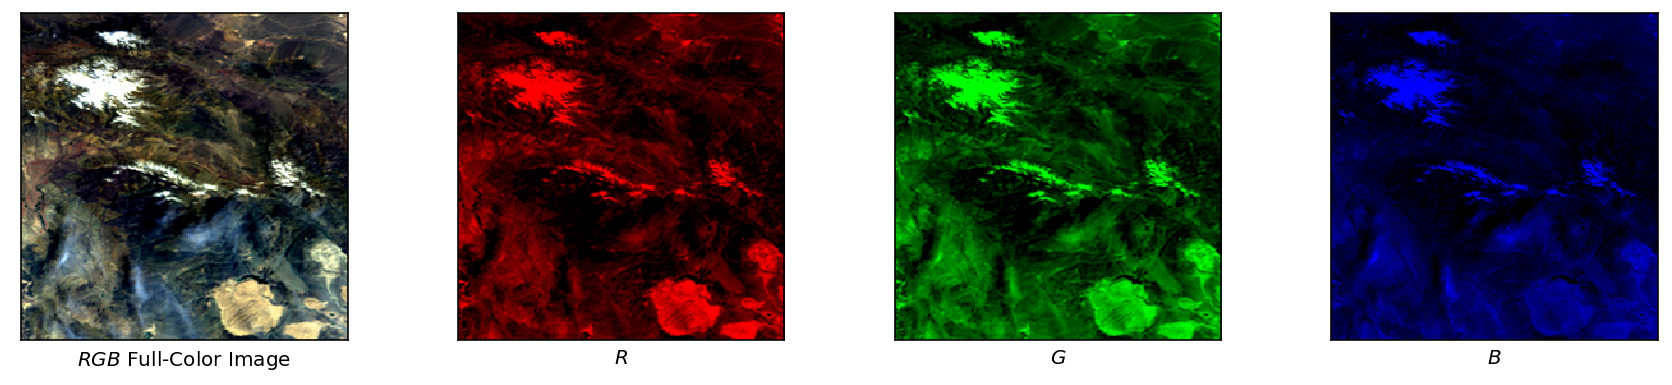

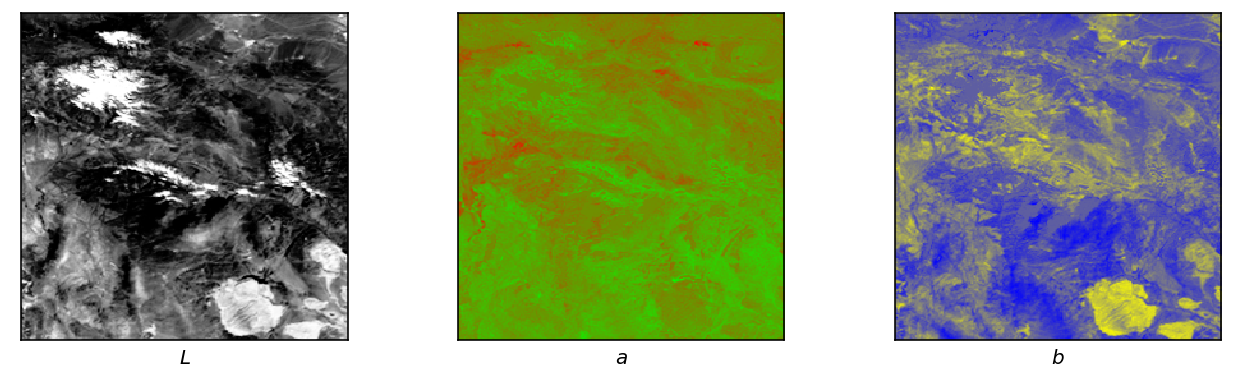

In [25]:
mpl.rcParams['figure.figsize']=(15,3)

# Full-color image
plt.figure()
plt.subplot(1,4,1)
plt.xticks([])
plt.yticks([])
plt.xlabel(r'$RGB$ Full-Color Image')
imshow(sat_img)

# Red channel
cdict = {'red': ((0.0, 0.0, 0.0), (1.0, 1.0, 1.0)),
         'green': ((0.0, 0.0, 0.0), (1.0, 0.0, 0.0)),
         'blue': ((0.0, 0.0, 0.0), (1.0, 0.0, 0.0))}
BkRd = mpl.colors.LinearSegmentedColormap('BkRd',cdict,256)
plt.subplot(1,4,2)
plt.xticks([])
plt.yticks([])
plt.xlabel(r'$R$')
imshow(sat_img[:,:,0], cmap = BkRd)

# Green channel
cdict = {'red': ((0.0, 0.0, 0.0), (1.0, 0.0, 0.0)),
         'green': ((0.0, 0.0, 0.0), (1.0, 1.0, 1.0)),
         'blue': ((0.0, 0.0, 0.0), (1.0, 0.0, 0.0))}
BkGn = mpl.colors.LinearSegmentedColormap('BkGn',cdict,256)
plt.subplot(1,4,3)
plt.xticks([])
plt.yticks([])
plt.xlabel(r'$G$')
imshow(sat_img[:,:,1], cmap = BkGn)

# Blue Channel
cdict = {'red': ((0.0, 0.0, 0.0), (1.0, 0.0, 0.0)),
         'green': ((0.0, 0.0, 0.0), (1.0, 0.0, 0.0)),
         'blue': ((0.0, 0.0, 0.0), (1.0, 1.0, 1.0))}
BkBl = mpl.colors.LinearSegmentedColormap('BkBl',cdict,256)
plt.subplot(1,4,4)
plt.xticks([])
plt.yticks([])
plt.xlabel(r'$B$')
imshow(sat_img[:,:,2], cmap = BkBl)

# Lab figures
plt.figure()

# L - luminosity
plt.subplot(1,4,2)
plt.xticks([])
plt.yticks([])
plt.xlabel(r'$L$')
imshow(sat_lab[:,:,0], cmap = cm.Greys_r)

# a - red-green axis
cdict = {'red': ((0.0, 0.0, 0.0), (1.0, 1.0, 1.0)),
         'green': ((0.0, 1.0, 1.0),(1.0, 0.0, 0.0)),
         'blue': ((0.0, 0.0, 0.0), (1.0, 0.0, 0.0))}
RdGr = mpl.colors.LinearSegmentedColormap('RdGr',cdict,256)
plt.subplot(1,4,3)
plt.xticks([])
plt.yticks([])
plt.xlabel(r'$a$')
imshow(sat_lab[:,:,1], cmap = RdGr)

# b - blue-yellow axis
cdict = {'red': ((0.0, 0.0, 0.0), (1.0, 1.0, 1.0)),
         'green': ((0.0, 0.0, 0.0), (1.0, 1.0, 1.0)),
         'blue': ((0.0, 1.0, 1.0), (1.0, 0.0, 0.0))}
BlYw = mpl.colors.LinearSegmentedColormap('BlYw',cdict,256)
plt.subplot(1,4,4)
plt.xticks([])
plt.yticks([])
plt.xlabel(r'$b$')
imshow(sat_lab[:,:,2], cmap = BlYw)

# Using Clustering to Segment Images in the Lab Colorspace

Now that we've converted to the Lab colorspace, we can use clustering to segment satellite images into different colors.  In the Lab colorspace, the color information is contained in the a and b channels.  Pixels that have a and b channel coordinates that are far apart represent colors that are more different from one another.  So, to segment images we'll apply K-means clustering on points in 2D space (where the 2D space are the _a_ and _b_ channel coordinates).

First, let's extract the _a_ and _b_ channels from the full `sat_lab` image so we can run our clustering analysis on it.

ab_sat=sat_lab[:,:,1:2]

In [31]:

ab_sat=sat_lab[:,:,1:]

In [32]:
ab_sat.shape

(256, 256, 2)

Because the methods can be fairly memory intensive, let's downscale the image a little bit to do less work.  We will use NumPy slicing to keep every _third_ pixel in each direction (remove ${1}/{3}$ of each dimension).

In [33]:
ab_sat_small = ab_sat[::3,::3]

In [34]:
ab_sat_small.shape

(86, 86, 2)

Now, we will want to "flatten" our image so that it is represented as one large vector that we can use for clustering.  Convert `ab_sat_small` into a $(\text{width} \times \text{height})$ by $2$ array, numpy's [`reshape()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) function may be useful here.

In [38]:
print(ab_sat_small.shape)

(86, 86, 2)


In [39]:
ab_sat_vec = np.reshape(ab_sat_small, (7396, 2))

In [40]:
ab_sat_vec.shape

(7396, 2)

### Determining number of Clusters
Use the silhouette method as described above to identify the two most likely numbers of clusters between 2 and 9.  The values may be very close to one another, you might be able to use `np.argsort()` to get the indices of the largest values.

In [43]:
best_cluster = 0
index_cluster = 0
for k in range(2, 9):
    new_est = KMeans(n_clusters = k)
    new_est.fit(ab_sat_vec)
    new_clusters = new_est.predict(ab_sat_vec)
    mean = metrics.silhouette_score(ab_sat_vec, new_clusters)
    if mean > best_cluster:
        best_cluster = mean
        index_cluster = k

nclusters = index_cluster

In [44]:
print(nclusters)

2


### Clustering on _a_ and _b_ channels
Use `sklearn.cluster.KMeans` to perform clustering on the color coordinates in the a and b channels of the Lab colorspace for the 2 values of $k$ identified in the previous part. When calling $k$-means, pass `n_init=10` to run only ten times.

In [45]:
cluster_1 = KMeans(n_clusters=nclusters, n_init=10)
# insert code here
cluster_1.fit(ab_sat_vec)
cluster_2 = KMeans(n_clusters=3, n_init=10)
#insert code here
cluster_2.fit(ab_sat_vec)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Segment the data
Use the function `show_segmentations()` given below to illustrate the image segmentations resulting from the clustering performed above for the 2 values of $k$ previously identified.

In [46]:
def show_segmentations(image_rgb, n_colors, pixel_labels):
    '''
    Illustrate segmentations of original image by color cluster.
    
    Args:
        image_rgb (numpy array): RGB image array
        n_colors (int): number of colors
        pixel_labels (numpy array): 1d array indicating pixel labels
    '''    
    # Show pixel labeling
    mpl.rcParams['figure.figsize']=(5,5)
    plt.figure
    plt.xticks([])
    plt.yticks([])
    imshow(image_rgb, cmap = cm.Blues_r)
    plt.title('Image Segmentation')
    plt.show()
    
    pixel_labels = pixel_labels.reshape(image_rgb.shape[:2])
    
    # Show each individual segment
    mpl.rcParams['figure.figsize']=(16,8)
    img_seg = np.zeros((n_colors,image_rgb.shape[0],image_rgb.shape[1],image_rgb.shape[2]))

    for k in range(n_colors):
        color_index = np.where(pixel_labels == k)
        img_seg[k,color_index[0],color_index[1]] = image_rgb[np.where(pixel_labels == k)]

        plt.subplot(2,np.ceil(n_colors/2),k+1)
        plt.xticks([])
        plt.yticks([])
        imshow(img_seg[k])
    plt.tight_layout()
    plt.suptitle('Individual Image Segments')
    plt.show()

Because classifying datapoints is less computationally expensive than fitting the model, we can afford to classify the whole original image here.  Flatten `ab_sat` as before, this time keeping all the pixels intact.

In [47]:
ab_sat_large = ab_sat[::,::]

In [49]:
ab_sat_large.shape

(256, 256, 2)

Use the [`KMeans.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) function to determine the cluster that each pixel belongs to.  This will return an array with a cluster value for each pixel.

In [50]:
large_image = np.reshape(ab_sat_large, (65536, 2))

In [51]:
predictions_1 = cluster_1.predict(large_image)
predictions_2 = cluster_2.predict(large_image)

Now we can visualize the satellite segementations, the `show_segmentations()` function will display each clustered group of pixels as a separate image.  It becomes easier to see the different features that the clustering algorithm picked out as similar to each other. 

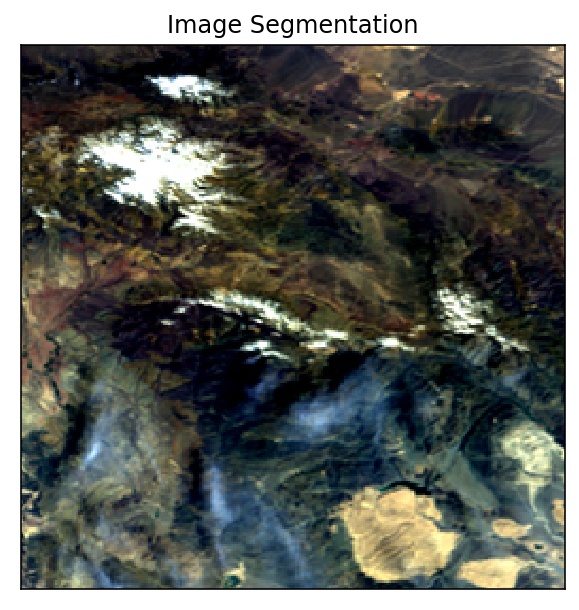

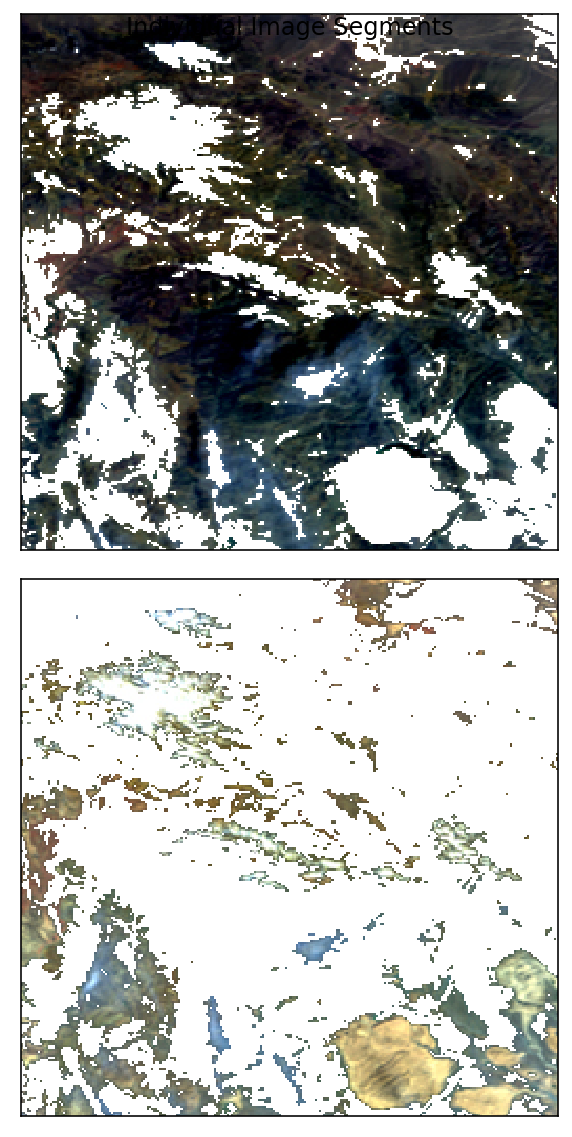

In [52]:
show_segmentations(sat_img, cluster_1.n_clusters, predictions_1)

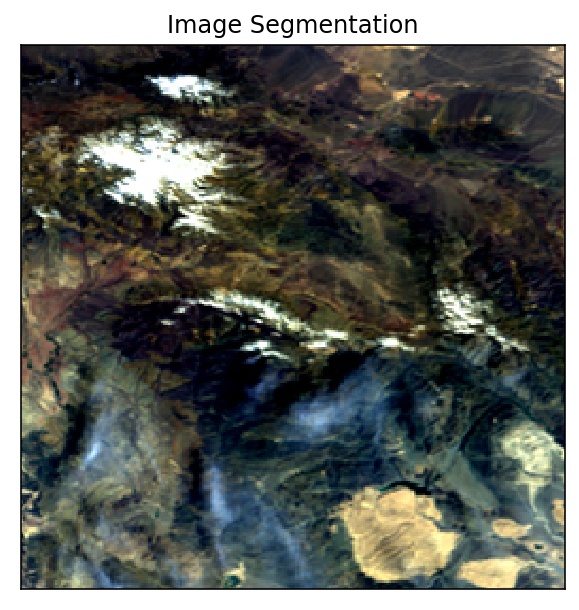

In [53]:
show_segmentations(sat_img, cluster_2.n_clusters, predictions_2)

The above lesson was originally developed by Erhu Du, Jane Lee, and Neal Davis for the department of Computational Science and Engineering at the University of Illinois.  Development was supported by a grant from MathWorks, Inc.